In [60]:
import numpy as np
import pandas as pd

In [61]:
df = pd.read_csv('spam.csv',encoding='latin')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df.shape

(5630, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5630 non-null   object
 1   Message   5630 non-null   object
dtypes: object(2)
memory usage: 88.1+ KB


In [64]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [65]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df.sample(5)

,Category,Message
1093,ham,Where r we meeting?
3831,ham,I agree. So i can stop thinkin about ipad. Can...
5563,ham,Ard 6 like dat lor.
4850,ham,either way works for me. I am &lt;#&gt; year...
2889,ham,I take it we didn't have the phone callon Frid...


In [67]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [69]:
df['target'] = encoder.fit_transform(df['target'])

In [70]:
print(df.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [71]:
df.duplicated().sum()

np.int64(415)

In [72]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [73]:
df.shape

(5215, 2)

In [74]:
df['target'].value_counts()

target
0    4516
1     699
Name: count, dtype: int64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import nltk

In [77]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SHIVANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [78]:
pd.options.mode.copy_on_write = True

In [79]:
df['num_char']=df['text'].apply(len)

In [80]:
df.sample(5)

,target,text,num_char
118,0,Goodo! Yes we must speak friday - egg-potato r...,71
4036,1,YOU ARE CHOSEN TO RECEIVE A Â£350 AWARD! Pls c...,159
2145,1,FreeMsg: Hey - I'm Buffy. 25 and love to satis...,154
2092,0,Then get some cash together and I'll text jason,47
4913,0,I am on the way to tirupur.,27


In [81]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df.sample(5)

,target,text,num_char,num_words
3931,0,I thk Ã¼ gotta go home by urself. Cos i'll b g...,83,22
4581,0,Hi ....My engagement has been fixd on &lt;#&g...,142,41
4274,0,Kind of. Just missed train cos of asthma attac...,106,26
2214,0,"Goodmorning, today i am late for 2hrs. Because...",60,14
5138,0,Yup... I havent been there before... You want ...,87,22


In [83]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_char,num_words,num_sentences
1824,0,Same as u... Dun wan... Y u dun like me alread...,84,23,2
5165,0,Ã still got lessons? Ã in sch?,33,9,2
4653,0,Where r e meeting tmr?,22,6,1
3457,0,Ok. I.ll do you right later.,28,7,1
2201,0,Haha... can... But i'm having dinner with my c...,54,13,2


In [84]:
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,699.000000,699.000000,699.000000
mean,130.791130,26.288984,2.879828
std,37.583975,8.314005,1.463944
min,7.000000,2.000000,1.000000
25%,120.000000,23.000000,2.000000
50%,146.000000,28.000000,3.000000
75%,156.500000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

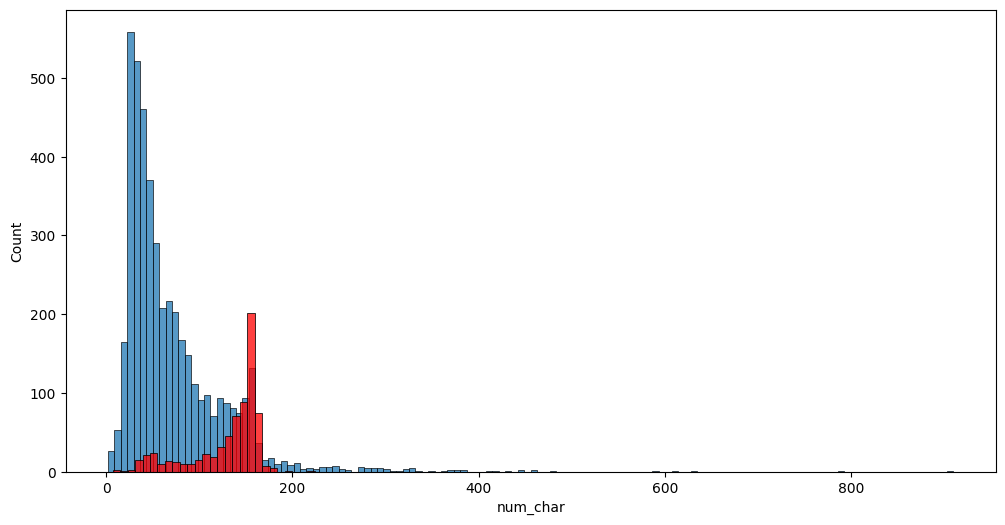

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='r')

<Axes: xlabel='num_words', ylabel='Count'>

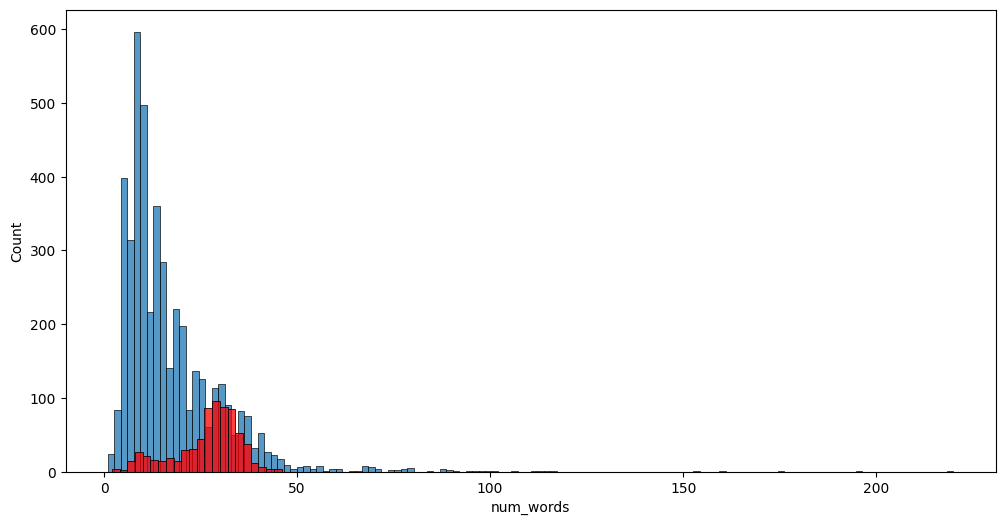

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

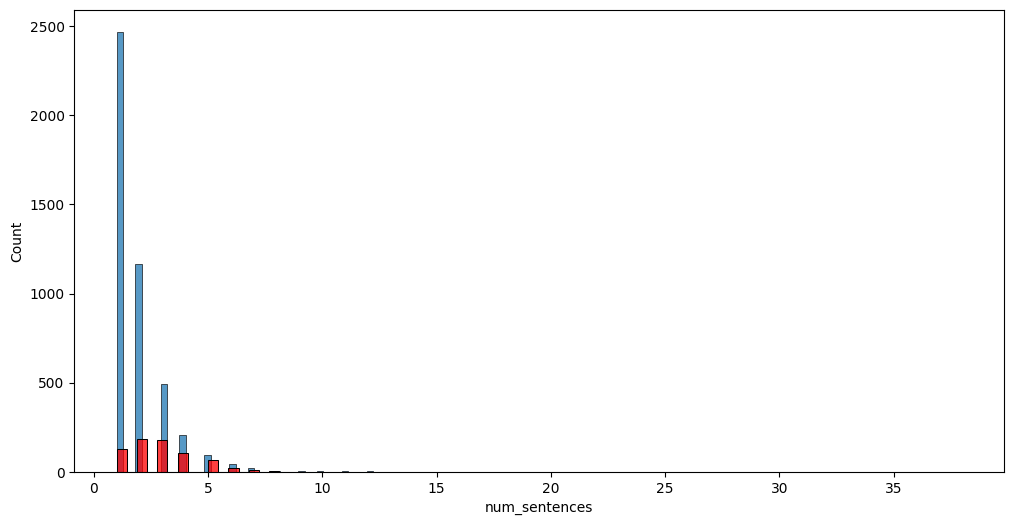

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

In [89]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHIVANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [91]:
print(transform_text("Hello EVeryone"))

hello everyon


In [92]:
print(ps.stem('Having'))

have


In [93]:
df['transform_text']=df['text'].apply(transform_text)
df.sample(5)

,target,text,num_char,num_words,num_sentences,transform_text
4267,0,The greatest test of courage on earth is to be...,85,17,1,greatest test courag earth bear defeat without...
1424,0,Lol great now im getting hungry.,32,7,1,lol great im get hungri
1305,0,Your right! I'll make the appointment right now.,48,11,2,right make appoint right
5426,0,Oh yeah! And my diet just flew out the window,45,11,2,oh yeah diet flew window
1516,0,I wonder if you'll get this text?,33,9,1,wonder get text


model building

In [94]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [95]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [96]:
X.shape

(5215, 3000)

In [97]:
y=df['target'].values
y.shape

(5215,)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [100]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [101]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8657718120805369
[[787 114]
 [ 26 116]]
0.5043478260869565


In [102]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965484180249281
[[900   1]
 [ 35 107]]
0.9907407407407407


In [103]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9712368168744008
[[899   2]
 [ 28 114]]
0.9827586206896551


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [105]:
lg=LogisticRegression()
mnb=MultinomialNB()
svc=SVC(kernel='sigmoid',gamma=1.0)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
bc=BaggingClassifier(n_estimators=50,random_state=2)

In [106]:
clfs={
    'lg':lg,
    'svc':svc,
    'mnb':mnb,
    'rfc':rfc,
    'knc':knc,
    'dtc':dtc,
    'bc':bc
}

In [107]:
def train_classifier(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred=clfs.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For lg
Accuracy - 0.9405560882070949
Precision - 0.9545454545454546
For svc
Accuracy - 0.9674017257909875
Precision - 0.95
For mnb
Accuracy - 0.965484180249281
Precision - 0.9907407407407407
For rfc
Accuracy - 0.965484180249281
Precision - 0.9907407407407407
For knc
Accuracy - 0.9012464046021093
Precision - 1.0
For dtc
Accuracy - 0.9242569511025887
Precision - 0.8
For bc
Accuracy - 0.9530201342281879
Precision - 0.872


In [110]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,knc,0.901246,1.000000
3,rfc,0.965484,0.990741
2,mnb,0.965484,0.990741
0,lg,0.940556,0.954545
1,svc,0.967402,0.950000
6,bc,0.953020,0.872000
5,dtc,0.924257,0.800000


In [111]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,knc,Accuracy,0.901246
1,rfc,Accuracy,0.965484
2,mnb,Accuracy,0.965484
3,lg,Accuracy,0.940556
4,svc,Accuracy,0.967402
5,bc,Accuracy,0.953020
6,dtc,Accuracy,0.924257
7,knc,Precision,1.000000
8,rfc,Precision,0.990741
9,mnb,Precision,0.990741


In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
voting = VotingClassifier(estimators=[('mnb',mnb),('knc',knc),('rfc',rfc)],voting='soft')
voting.fit(X_train,y_train)

,estimators,"[('mnb', ...), ('knc', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,n_neighbors,5


In [114]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.947267497603068
Precision 1.0


In [115]:
from sklearn.ensemble import StackingClassifier
estimators=[('knc', knc), ('mnb', mnb), ('rfc',rfc)]
final_estimator=RandomForestClassifier()
stacking= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [116]:
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9721955896452541
Precision 0.937984496124031


In [117]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))